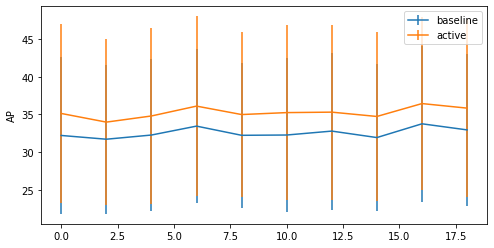

In [29]:
aps = []

import random 
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, namedtuple

traj_aps_base, traj_aps_act = defaultdict(list), defaultdict(list)

for t in range(200):
    mul = 1
    if random.randint(0,10) > 7: # make active better than baseline ~70% of the time
        mul = -1
    for p in range(0,20,2):
        ap = random.uniform(15, 50)
        traj_aps_base[p].append(ap)
        traj_aps_act[p].append(ap+mul*random.randint(0,10))
    
meanvar = namedtuple('meanvar', 'mean, var')

def get_mean_var(a):
    mv = defaultdict(meanvar)
    for p, aps in a.items():
        # print([
        mv[p] = meanvar(np.average(aps), np.var(aps))
    return mv
    
def draw(xs, ys, ys_err, label):
    plt.ylabel('AP')
    plt.errorbar(xs, ys, yerr=ys_err, label=label) 

import math

# plot
def plot(a, b):
    fig = plt.figure(figsize=(8,4))
    for x, label in [a, b]:
        x_mv = get_mean_var(x) 
        xs, xv, xerr = [], [], []
        for k, v in x_mv.items():
            xs.append(k)
            xv.append(v.mean)
            xerr.append(math.sqrt(v.var))
        draw(xs, xv, xerr, label)
    plt.legend()    
    plt.show()
    
plot((traj_aps_base, 'baseline'), (traj_aps_act, 'active'))